<a href="https://colab.research.google.com/github/Akhil-Titus/hand-gesture-controlled-assistant/blob/main/hand_sign_model_maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import warnings
warnings.filterwarnings("ignore")
import shutil
import glob

In [ ]:
CLASS=['double_click', 'left_click']

Model building

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import keras

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model   # functional API

In [ ]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator 

In [ ]:
  base_model = InceptionV3(input_shape=(224,224,3), include_top = False)

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(base_model.output)
x = Dense(units=3, activation='sigmoid')(x) #changed here
#x = Dense(units=3, activation='softmax')(x)

In [ ]:
"""model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()]) 
https://medium.com/analytics-vidhya/transfer-learning-using-inception-v3-for-image-classification-86700411251b
"""


#Final Model
model = Model(base_model.input, x)

#compile the model
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

"""
#compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])
"""
#Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

Data Preprocessing  (Might be unnecessary for us)

In [ ]:
train_data_gen = ImageDataGenerator(featurewise_center = True,
                                    rotation_range = 0.4,
                                    width_shift_range = 0.3,
                                    horizontal_flip = True,
                                    preprocessing_function = preprocess_input,
                                    zoom_range= 0.4,
                                    shear_range = 0.4)
# train_data_gen = ImageDataGenerator(featurewise_center = True,
#                                     width_shift_range = 0.3,
#                                     horizontal_flip = True,
#                                     preprocessing_function = preprocess_input,
#                                     shear_range = 0.4)

In [ ]:
train_data = train_data_gen.flow_from_directory(directory='/content/Data',
                                                target_size=(224,224),
                                                batch_size=36)    #changed

Found 511 images belonging to 3 classes.


In [ ]:
train_data.class_indices

{'.ipynb_checkpoints': 0, 'left_click': 1, 'right_click': 2}

Data Visualize

In [ ]:
t_img, label = train_data.next()

In [ ]:
t_img.shape

(36, 224, 224, 3)

In [ ]:
def plot_images(img_arr, label):
  """
  input : image array
  output :plot images
  """
  for indx, imgs in enumerate(img_arr):
    if indx <= 10:
      plt.figure(figsize =(5,5))
      plt.imshow(imgs)
      plt.title(imgs.shape)
      plt.axis = False
      plt.show()


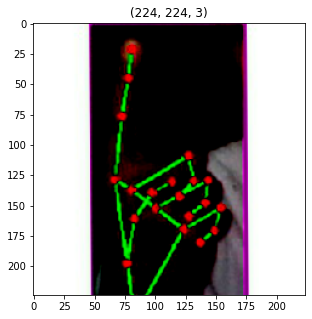

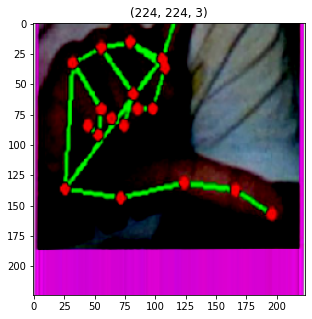

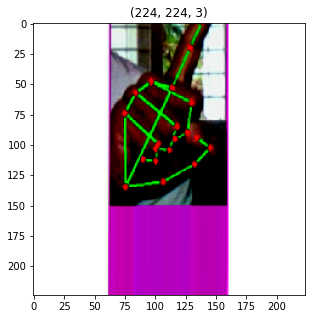

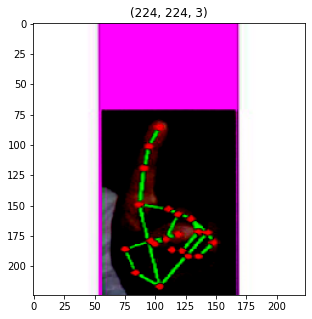

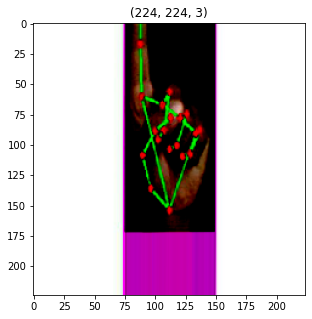

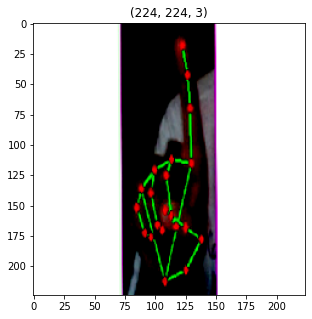

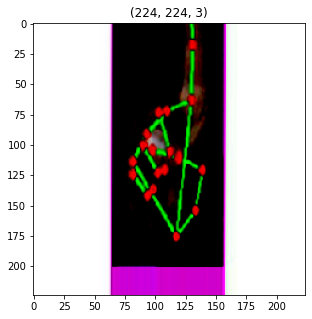

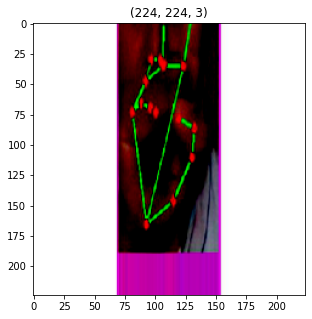

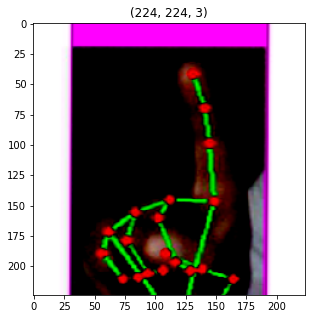

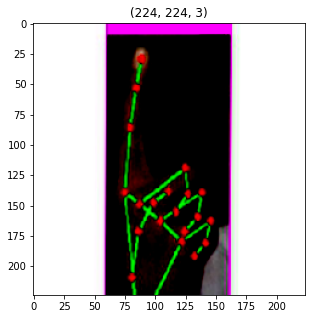

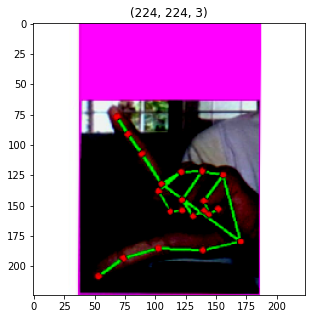

In [ ]:
plot_images(t_img, label)

Model Checkpoint

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath = "./best_model2.h5",
                     monitor = "accuracy",
                     verbose = 1,
                     save_best_only= True)

es = EarlyStopping(monitor = "accuracy",
                   min_delta = 0.01,
                   patience = 5,
                   verbose  =1)

call_back = [mc, es]

In [ ]:
his = model.fit_generator(train_data, steps_per_epoch= 10, epochs = 30, callbacks =call_back)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 26.2185 - accuracy: 0.5166
Epoch 1: accuracy improved from -inf to 0.51662, saving model to ./best_model2.h5
10/10 [==============================] - 5s 553ms/step - loss: 26.2185 - accuracy: 0.5166
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 11.1485 - accuracy: 0.5770
Epoch 2: accuracy improved from 0.51662 to 0.57704, saving model to ./best_model2.h5
10/10 [==============================] - 5s 469ms/step - loss: 11.1485 - accuracy: 0.5770
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 3.9082 - accuracy: 0.6556
Epoch 3: accuracy improved from 0.57704 to 0.65559, saving model to ./best_model2.h5
10/10 [==============================] - 5s 483ms/step - loss: 3.9082 - accuracy: 0.6556
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.9190 - accuracy: 0.7674
Epoch 4: accuracy improved from 0.65559 to 0.76737, saving model to ./best_model2.h5
10/10 [=========

In [ ]:
from keras.models import load_model
model = load_model("/content/best_model2.h5")

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

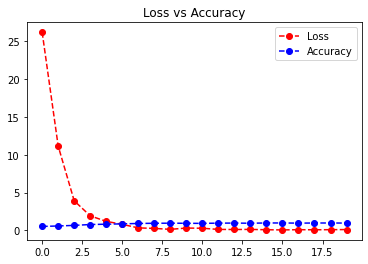

In [ ]:
plt.plot(h['loss'],'go--',c = "red",label='Loss')
plt.plot(h['accuracy'],'go--',c = "blue", label='Accuracy')
plt.legend(loc='upper right')

plt.title("Loss vs Accuracy")
plt.show()

In [ ]:
acc = his.history


In [ ]:
for x in acc:
  print(x)

loss
accuracy
